In [1]:
from src.processing import RoiAnalyser

In [2]:
DATA_DIR = "data/#2451333014_ZProj_B IVA76"  # input data directory path
OUTPUT_DIR = "out"  # output results directory path
PLOT = True  # whether to show plots

SIZE_THRESHOLD = 3000  # size threshold for filtering clusters

Loaded files:
tritc: E6ROI5_-2_4_1_ZProj[Confocal TRITC 556,600]_001.tif
dapi: E6ROI5_-2_2_1_ZProj[Confocal DAPI 405,442]_001.tif
gfp: E6ROI5_-2_3_1_ZProj[Confocal GFP 472,520]_001.tif

Analysing: E6ROI5, 
Step 1: Preprocessing DAPI image...
Step 2: Finding contours...
  Found 4 clusters


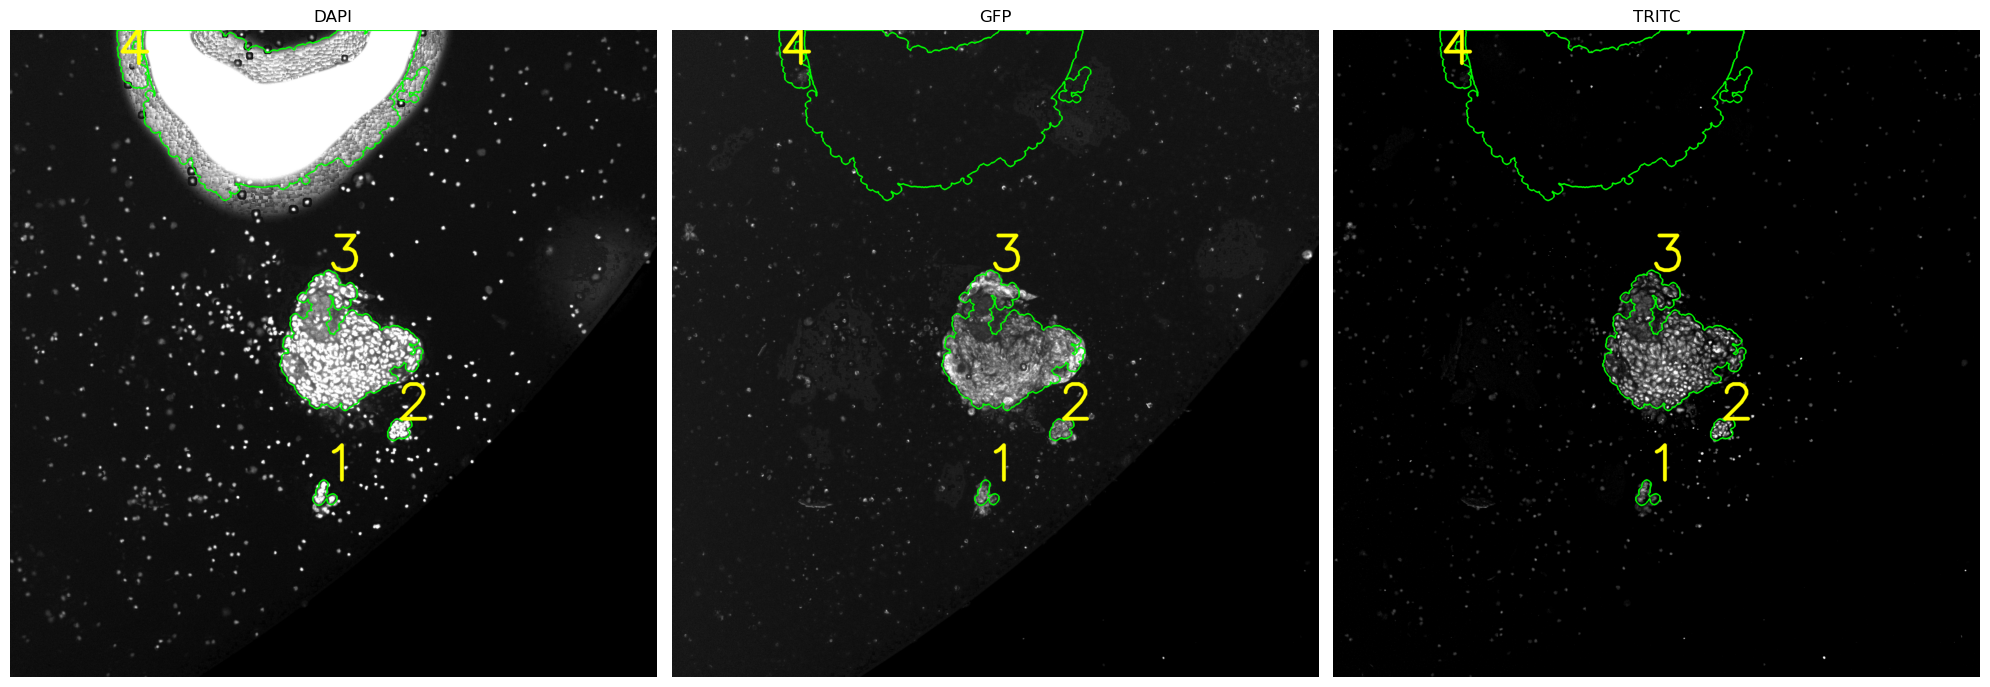

Step 3: Building GFP and TRITC histograms for clusters...


In [3]:
roi_name = "E6ROI5"
analyser = RoiAnalyser(DATA_DIR, roi_name, OUTPUT_DIR, PLOT, SIZE_THRESHOLD)
# analyser = RoiAnalyser(DATA_DIR, roi_name, OUTPUT_DIR, PLOT, SIZE_THRESHOLD, opening_kernel=13, dilatation_kernel=7, dilatation_iter=1, opening_iter=2)

z = ""
clusters, channel_histograms = analyser.run_analysis(z)

(**OPTIONAL**) Run the histogram analysis for different Z

In [ ]:
z = "Z6"  # change me

print("Step 4: Repeat for additional Zs...")
channels = analyser.repeat_for_additional_images(z, clusters, channel_histograms)

Save the calculated histograms as `.csv` files

In [4]:
# save histograms
print("Step 5: Saving histograms")
out_files = analyser.save_histogram(channel_histograms)
print(out_files)

Step 5: Saving histograms

Saving histogram data for ROI: E6ROI5
  Successfully saved GFP histogram data to out/E6ROI5/E6ROI5_GFP.csv
  Successfully saved TRITC histogram data to out/E6ROI5/E6ROI5_TRITC.csv
{'GFP': 'out/E6ROI5/E6ROI5_GFP.csv', 'TRITC': 'out/E6ROI5/E6ROI5_TRITC.csv'}


Calculate apopnec ratio

In [5]:
# change these
params = {
    "GFP": {"file": out_files["GFP"], "start_row": 72},
    "TRITC": {"file": out_files["TRITC"], "start_row": 72},
}

print("Step 6: Calculate apopnec ratio")
for name, args in params.items():
    analyser.apopnec_ratio(file=args["file"], start_row=args["start_row"])
    print(f"|Done with {name}|\n")

print("------------------")
print("Done :)")

Step 6: Calculate apopnec ratio
Saved as out/E6ROI5/E6ROI5_GFP.csv
|Done with GFP|

Saved as out/E6ROI5/E6ROI5_TRITC.csv
|Done with TRITC|

------------------
Done :)
